# Import Necessary Libraries 

In [148]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Representation

In [149]:
df=pd.read_csv('C:/Users/MINA/Downloads/car_purchasing.csv', encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [151]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [152]:
df.duplicated().sum()

0

In [153]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# Check Outlier

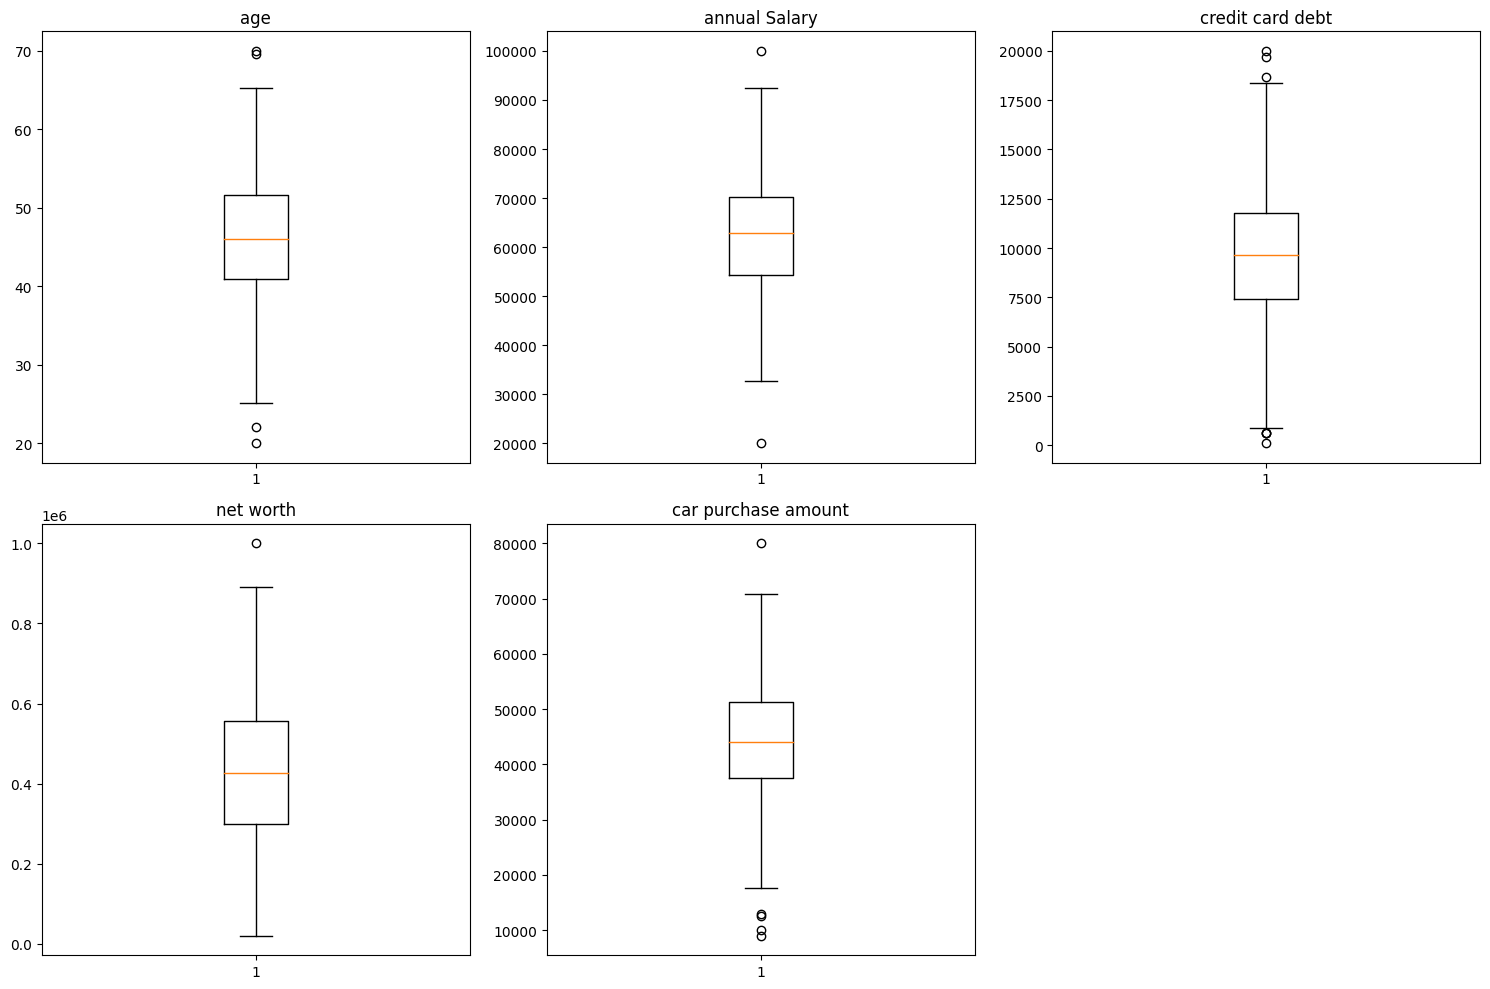

In [154]:
plt.figure(figsize=(15,10))
numeric_columns=["age",	"annual Salary","credit card debt",	"net worth","car purchase amount"]
for i in numeric_columns:
    plt.subplot(2,3,numeric_columns.index(i)+1)
    plt.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show()

Outliers detected in the data using a box plot.
While these points deviate significantly from the rest of the dataset,
they do not have a substantial effect on the results due to:
1. The robustness of the statistical methods being used (e.g., median, IQR-based measures).
2. The relatively small number of outliers compared to the overall dataset size.
3. Their minimal influence on the target variable or model performance.
Hence, we will retain these outliers in the data for this analysis.

# EDA

# ***Univariate Analysis***

In [155]:
cv=df["country"].value_counts()
cv

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

In [156]:
pc=px.scatter(cv,size=cv.values,color=cv.index,title="Distribuation of Countery")
pc.show()

 No Effect to Target Becouse max country Customer is lees than 8 and exist close by 221 Country


In [157]:
df["gender"] = df["gender"].map({0: "Female", 1: "Male"})
cg=df["gender"].value_counts()
cg

Male      253
Female    247
Name: gender, dtype: int64

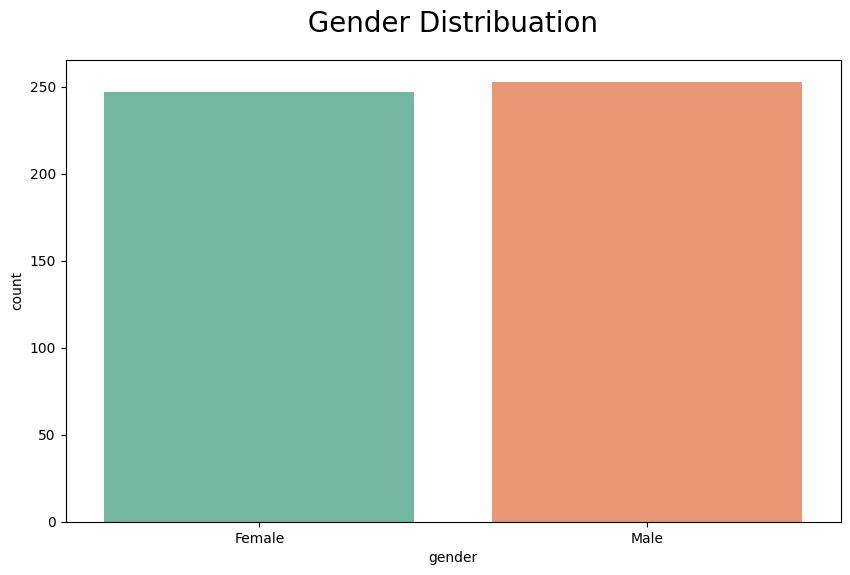

In [158]:
plt.figure(figsize=(10,6))
plt.title(" Gender Distribuation ",pad=20,size=20)
sns.countplot(data=df,x=df["gender"],palette="Set2")
plt.show()

In [159]:
df["age"].describe()

count    500.000000
mean      46.241674
std        7.978862
min       20.000000
25%       40.949969
50%       46.049901
75%       51.612263
max       70.000000
Name: age, dtype: float64

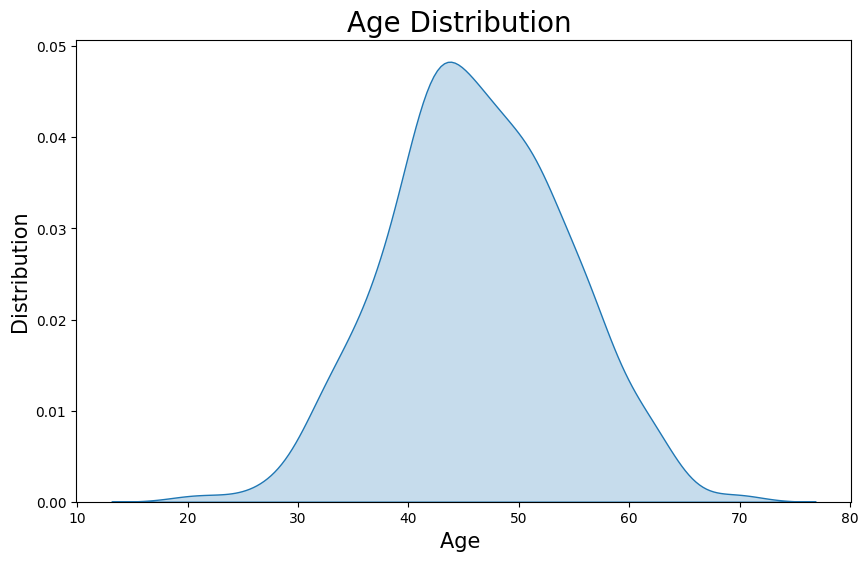

In [160]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["age"],fill=True,palette="Set2")
plt.title("Age Distribution ",fontsize=20)
plt.xlabel("Age ",fontsize=15)
plt.ylabel("Distribution",fontsize=15)
plt.show()

In [161]:
df["annual Salary"].describe()

count       500.000000
mean      62127.239608
std       11703.378228
min       20000.000000
25%       54391.977195
50%       62915.497035
75%       70117.862005
max      100000.000000
Name: annual Salary, dtype: float64

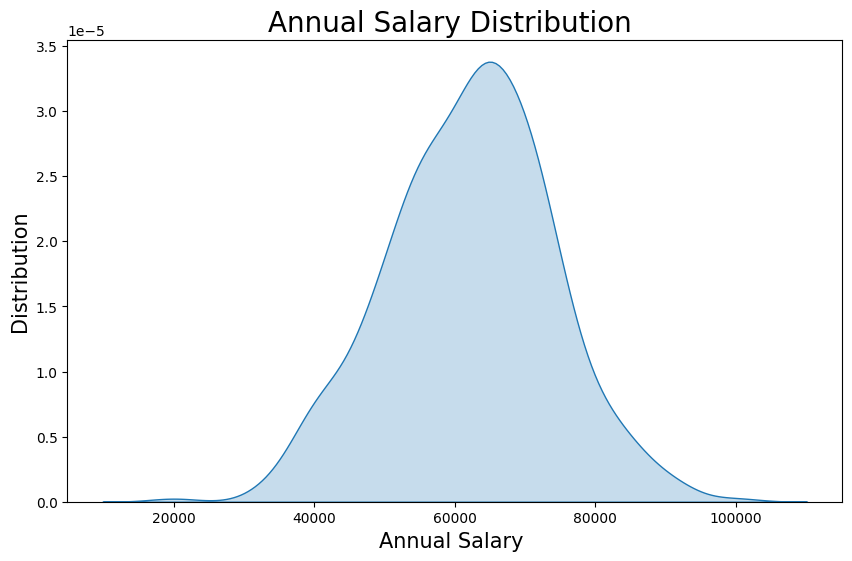

In [162]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["annual Salary"],fill=True,palette="Set2")
plt.title("Annual Salary Distribution ",fontsize=20)
plt.xlabel("Annual Salary ",fontsize=15)
plt.ylabel("Distribution",fontsize=15)
plt.show()

In [163]:
df["credit card debt"].describe()

count      500.000000
mean      9607.645049
std       3489.187973
min        100.000000
25%       7397.515792
50%       9655.035568
75%      11798.867487
max      20000.000000
Name: credit card debt, dtype: float64

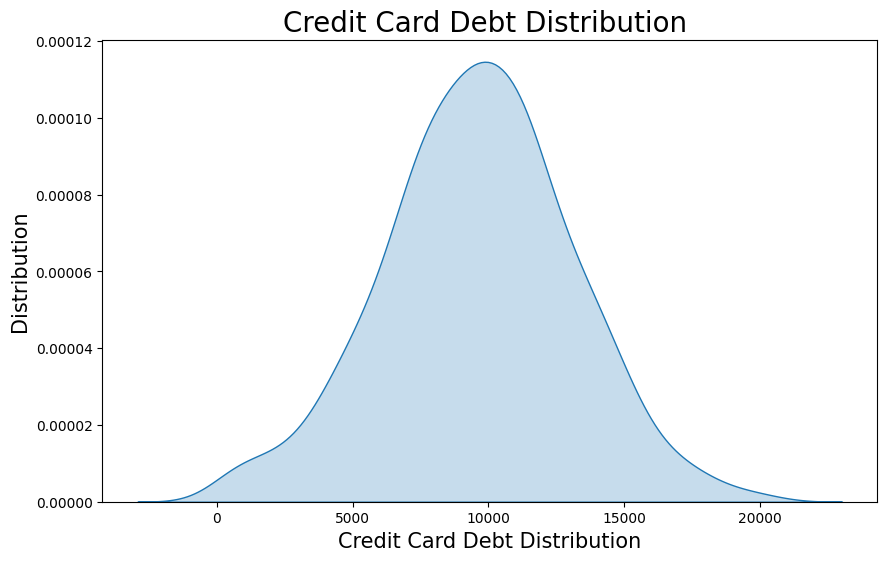

In [164]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["credit card debt"],fill=True,palette="Set2")
plt.title("Credit Card Debt Distribution ",fontsize=20)
plt.xlabel("Credit Card Debt Distribution",fontsize=15)
plt.ylabel("Distribution",fontsize=15)
plt.show()

In [165]:
df["net worth"].describe()

count        500.000000
mean      431475.713625
std       173536.756340
min        20000.000000
25%       299824.195900
50%       426750.120650
75%       557324.478725
max      1000000.000000
Name: net worth, dtype: float64

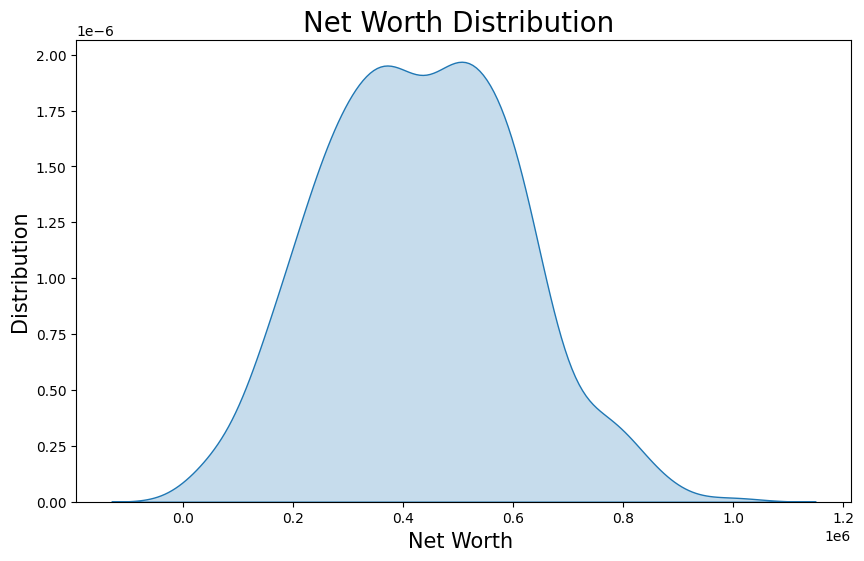

In [166]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["net worth"],fill=True,palette="Set2")
plt.title("Net Worth Distribution ",fontsize=20)
plt.xlabel("Net Worth ",fontsize=15)
plt.ylabel("Distribution",fontsize=15)
plt.show()

In [167]:
df["car purchase amount"].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

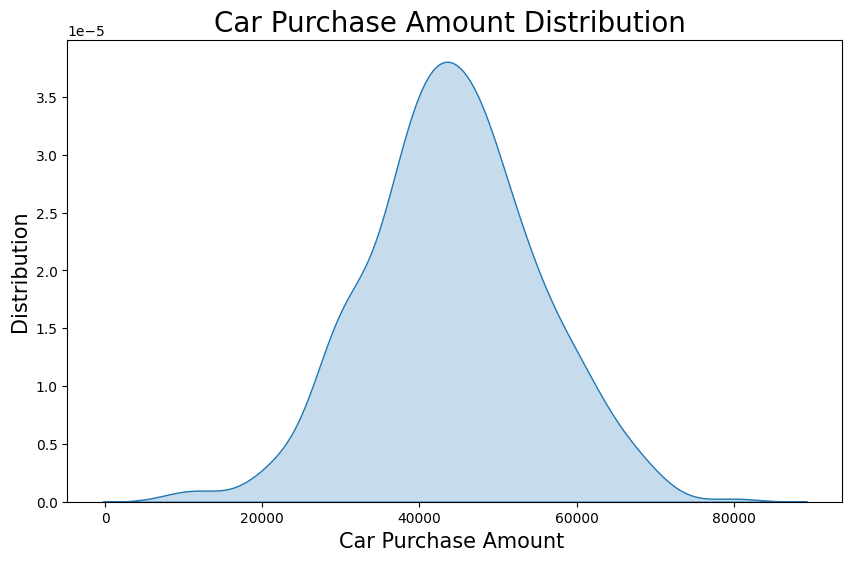

In [168]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["car purchase amount"],fill=True,palette="Set2")
plt.title("Car Purchase Amount Distribution ",fontsize=20)
plt.xlabel("Car Purchase Amount ",fontsize=15)
plt.ylabel("Distribution",fontsize=15)
plt.show()

# Bivariate  Analysis 

In [169]:
df.groupby("gender")["car purchase amount"].mean()

gender
Female    44933.131928
Male      43503.620644
Name: car purchase amount, dtype: float64

In [170]:
fig = px.scatter(df, x="age", y="car purchase amount",size="car purchase amount",color="age",title="Car Purchase Amount per Age")
fig.show()

In [171]:
fig = px.scatter(df, x="annual Salary", y="car purchase amount",size="car purchase amount",color="annual Salary",title="Car Purchase Car per Annual Salary")
fig.show()

In [172]:
fig = px.scatter(df, x="credit card debt", y="car purchase amount",size="car purchase amount",color="credit card debt",title="Car Purchase Car per Credit Card Debt ")
fig.show()

In [173]:
fig = px.scatter(df, x="net worth", y="car purchase amount",size="car purchase amount",color="net worth",title="Car Purchase Car per Net Worth")
fig.show()

# MultiVariate Analysis

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64


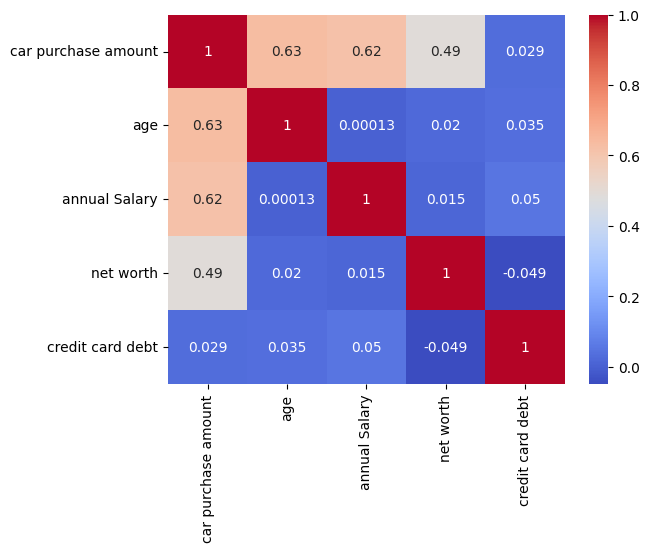

In [174]:
cm = df.corr()['car purchase amount'].sort_values(ascending=False)
sns.heatmap(df[cm.index].corr(), annot=True, cmap='coolwarm')   
print(cm)

# Data Preprocessing

Drop unneeded Columns

In [175]:
df.drop(columns=["customer name","customer e-mail","country","gender"],inplace=True)
df

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


Define X featur and y target


In [176]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

Data Scaling

In [177]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))


Data Spliting

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Model Structure

In [179]:
model=Sequential([
    Dense(10,activation="relu",input_dim=4),
    Dense(10,activation="relu"),
    Dense(1,activation="linear")
])
model.compile(optimizer="Adam",loss="mse")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [180]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2,verbose=1)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0638 - val_loss: 0.0211
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0214 - val_loss: 0.0114
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0130
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - val_loss: 0.0099
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0077
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - val_loss: 0.0068
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - val_loss: 0.0048
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

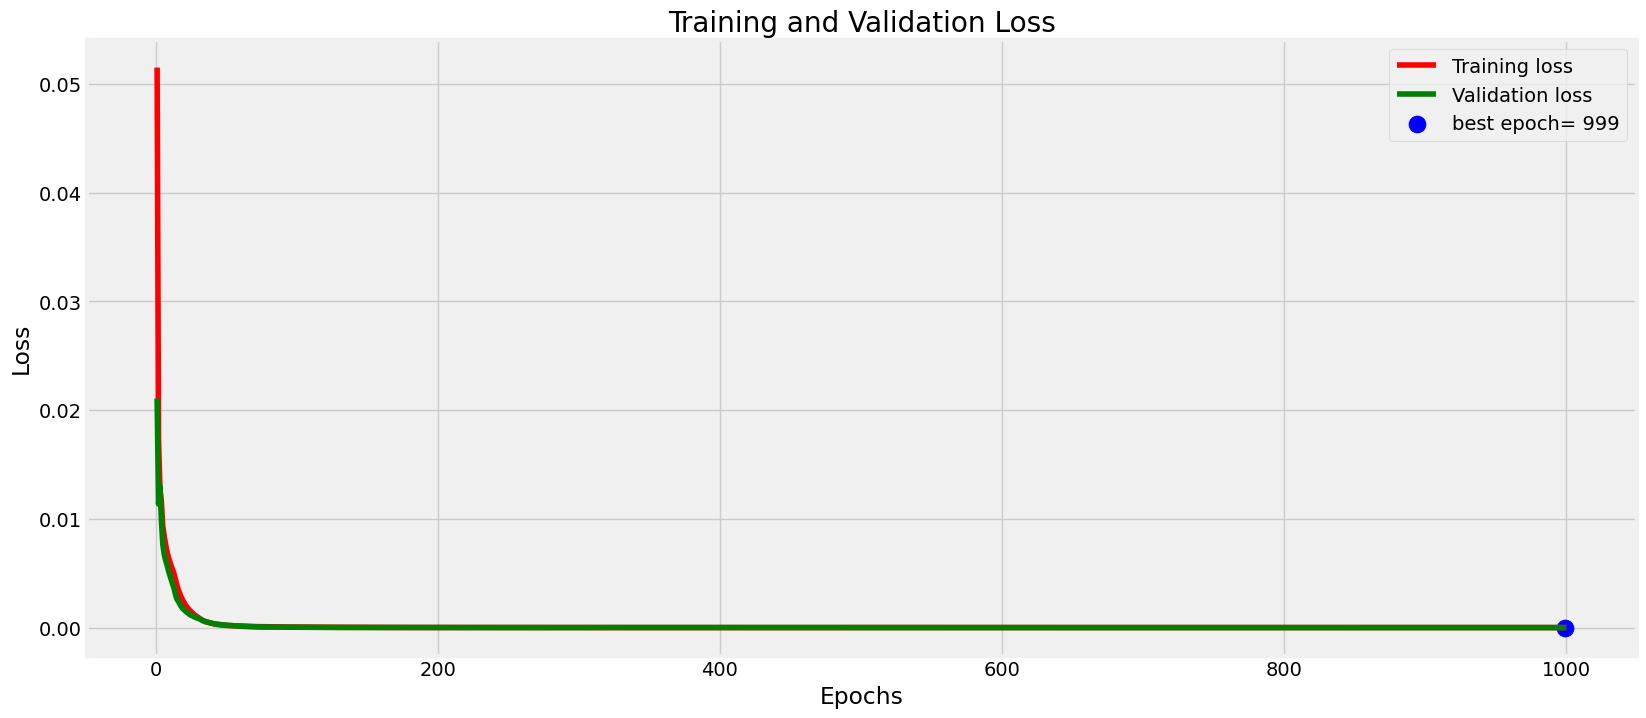

In [181]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


In [182]:
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [184]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9999593982029138
